In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv('dataset1.csv')

In [23]:
df.head()

,Sexe,Age,Poids,Hauteur,Sport,Indice
0,M,30.0,50,1.60,NaN,1
1,F,NaN,45,1.58,Foot,2
2,M,40.0,80,1.70,NaN,4
3,M,20.0,40,1.68,Basket,2
4,F,51.0,75,1.75,Volley,3


In [24]:
df.shape

(41, 6)

In [25]:
df.tail()

,Sexe,Age,Poids,Hauteur,Sport,Indice
36,M,34.0,74,1.71,NaN,3
37,F,NaN,63,1.63,Hand,2
38,M,27.0,56,1.63,NaN,1
39,F,37.0,57,1.66,Foot,1
40,M,42.0,78,1.86,NaN,4


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sexe     41 non-null     object 
 1   Age      37 non-null     float64
 2   Poids    41 non-null     int64  
 3   Hauteur  41 non-null     float64
 4   Sport    21 non-null     object 
 5   Indice   41 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ KB


In [27]:
df.isnull()

,Sexe,Age,Poids,Hauteur,Sport,Indice
0,False,False,False,False,True,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,True,False
9,False,False,False,False,False,False


In [28]:
df.isnull().count()

Sexe       41
Age        41
Poids      41
Hauteur    41
Sport      41
Indice     41
dtype: int64

<AxesSubplot:>

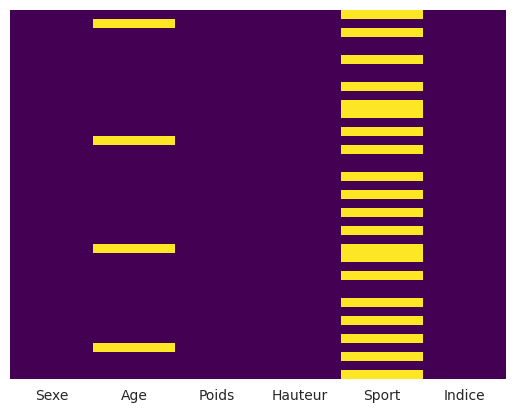

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Indice', ylabel='count'>

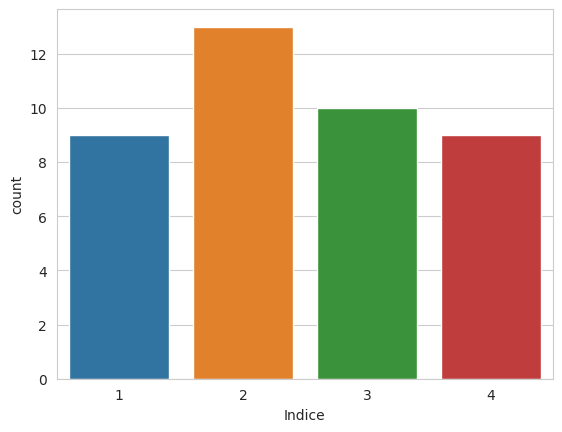

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Indice',data=df)

<AxesSubplot:xlabel='Indice', ylabel='count'>

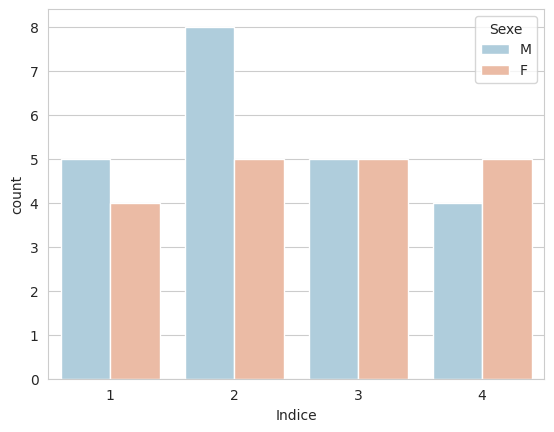

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Indice',hue='Sexe',data=df,palette='RdBu_r')

/home/admin123/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

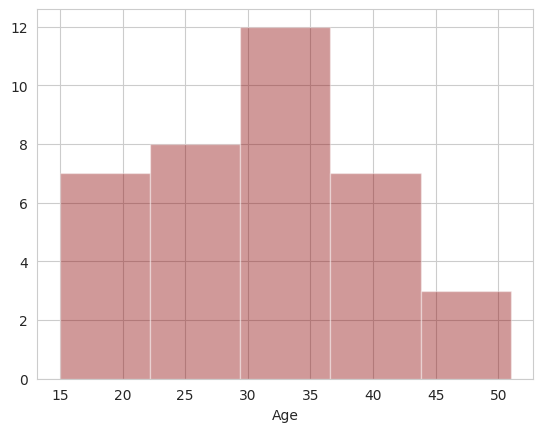

In [32]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=5)

<AxesSubplot:>

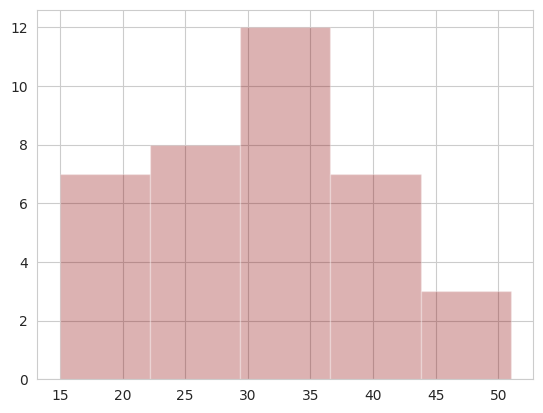

In [33]:
df['Age'].hist(bins=5,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='Indice', ylabel='count'>

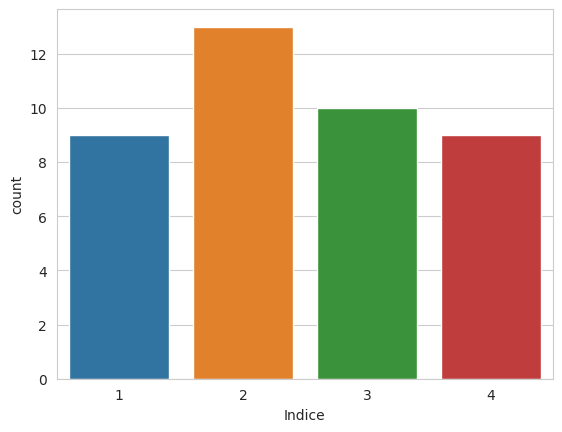

In [34]:
sns.countplot(x='Indice',data=df)

<AxesSubplot:>

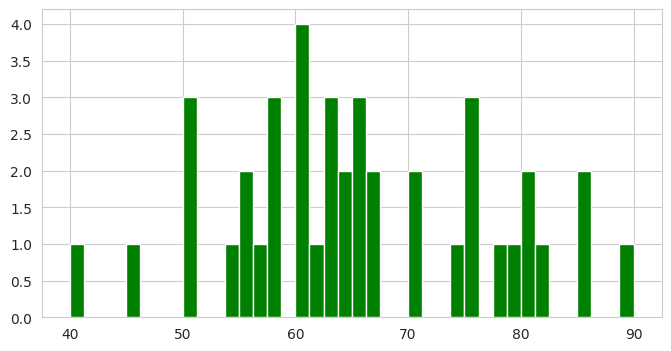

In [35]:
df['Poids'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Indice', ylabel='Age'>

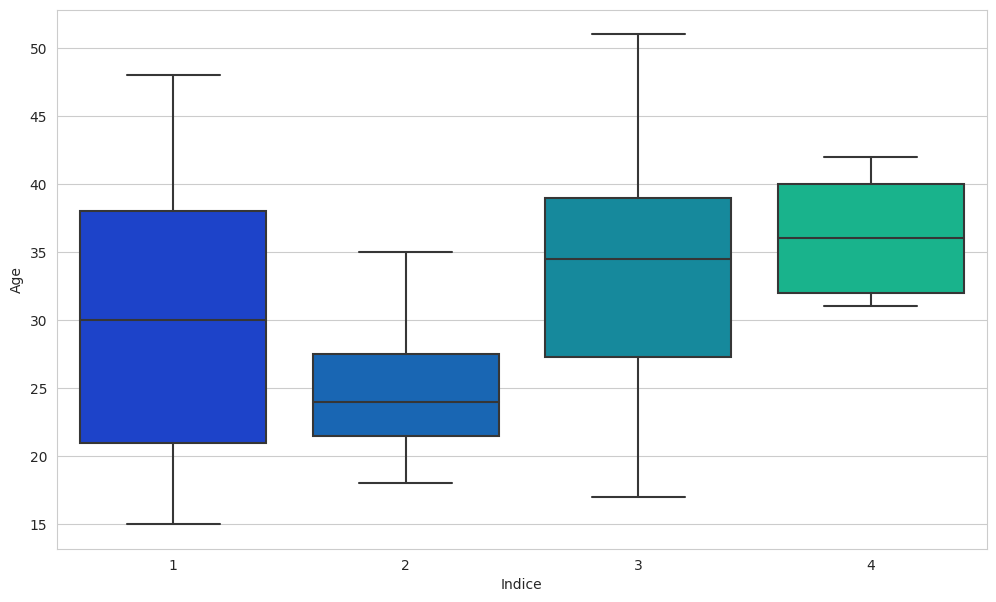

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Indice',y='Age',data=df,palette='winter')

In [37]:
def impute_age(cols):
    Age = cols[0]
    Indice = cols[1]
    
    if pd.isnull(Age):

        if Indice == 1:
            return 30

        elif Indice == 2:
            return 23
        
        elif Indice == 3:
            return 34

        else:
            return 36

    else:
        return Age

In [38]:
df['Age'] = df[['Age','Indice']].apply(impute_age,axis=1)

<AxesSubplot:>

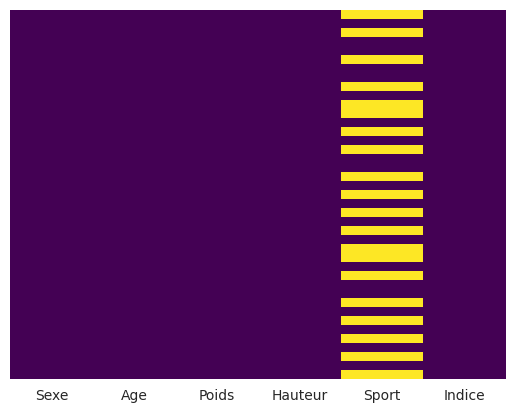

In [39]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
df.drop('Sport',axis=1,inplace=True)

<AxesSubplot:>

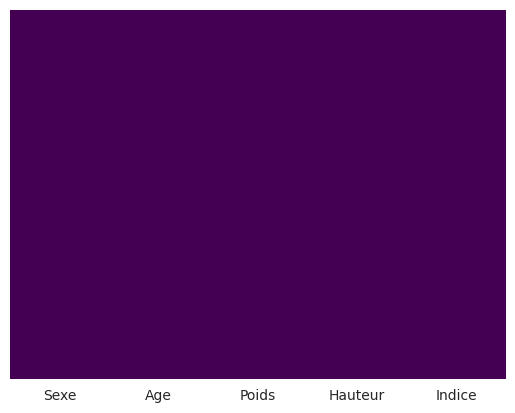

In [41]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
df.head()

,Sexe,Age,Poids,Hauteur,Indice
0,M,30.0,50,1.60,1
1,F,23.0,45,1.58,2
2,M,40.0,80,1.70,4
3,M,20.0,40,1.68,2
4,F,51.0,75,1.75,3


In [43]:
sex = pd.get_dummies(df['Sexe'],drop_first=True)

In [44]:
sex

,M
0,1
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,1
9,0


In [45]:
df.drop(['Sexe'],axis=1,inplace=True)

In [46]:
df.head()

,Age,Poids,Hauteur,Indice
0,30.0,50,1.60,1
1,23.0,45,1.58,2
2,40.0,80,1.70,4
3,20.0,40,1.68,2
4,51.0,75,1.75,3


In [47]:
df = pd.concat([df,sex],axis=1)

In [48]:
df.head()

,Age,Poids,Hauteur,Indice,M
0,30.0,50,1.60,1,1
1,23.0,45,1.58,2,0
2,40.0,80,1.70,4,1
3,20.0,40,1.68,2,1
4,51.0,75,1.75,3,0
